<a href="https://colab.research.google.com/github/admachindev/Challenge-stores/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [32]:
import pandas as pd

import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

In [89]:
tienda1.head(100)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Microondas,Electrodomésticos,722600.0,36700.0,30/09/2021,Ángel Rodriguez,Cúcuta,5,Nequi,1,7.89391,-72.50782
96,Olla de presión,Artículos para el hogar,78300.0,4600.0,27/09/2022,Mariana Herrera,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
97,Mesa de comedor,Muebles,279300.0,15300.0,03/05/2022,Santiago Silva,Bogotá,2,Tarjeta de crédito,6,4.60971,-74.08175
98,Bicicleta,Deportes y diversión,475100.0,23500.0,13/12/2020,Juan Fernandez,Medellín,5,Tarjeta de crédito,4,6.25184,-75.56359


#1. Análisis de facturación



En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [88]:
# Se calcular el total de ingresos por cada tienda usando la funcion sum()
ingresos_tienda1 = tienda1['Precio'].sum()
ingresos_tienda2 = tienda2['Precio'].sum()
ingresos_tienda3 = tienda3['Precio'].sum()
ingresos_tienda4 = tienda4['Precio'].sum()

# Se imprimen los resultados
print("Estos son los ingresos estimados por tienda:")
print(f"Tienda 1: ${ingresos_tienda1:,.0f}".replace(",", "."))
print(f"Tienda 2: ${ingresos_tienda2:,.0f}".replace(",", "."))
print(f"Tienda 3: ${ingresos_tienda3:,.0f}".replace(",", "."))
print(f"Tienda 4: ${ingresos_tienda4:,.0f}".replace(",", "."))

Estos son los ingresos estimados por tienda:
Tienda 1: $1.150.880.400
Tienda 2: $1.116.343.500
Tienda 3: $1.098.019.600
Tienda 4: $1.038.375.700


- Con un ingreso total de $1.150.880.400, la tienda 1 es la que más vendió, superando a las demás por un margen considerable que representa aproximadamente el 28.5% del total combinado de las 4 tiendas.


- La tienda 4 es la de menor ingreso, Con $1.038.375.700, se ubica en último lugar en términos de ingresos, aunque la diferencia con la tienda 3 no es muy grande.

- Hay una diferencia de $112.504.700 entre la tienda 1 y la tienda 4. Que equivale a casi un 10.8% menos de ingresos en comparación con la tienda 1.

- Los ingresos entre las tiendas 2 y 3 son relativamente parejos con solo $18.323.900 de diferencia que representa menos del 2%.

# 2. Ventas por categoría

In [105]:
# Agrupar por categoría y producto, luego contar cuántas veces aparece cada producto
productos_t1 = tienda1.groupby(["Producto", "Categoría del Producto"]).size().sort_values(ascending=False)
productos_t2 = tienda2.groupby(["Producto", "Categoría del Producto"]).size().sort_values(ascending=False)
productos_t3 = tienda3.groupby(["Producto", "Categoría del Producto"]).size().sort_values(ascending=False)
productos_t4 = tienda4.groupby(["Producto", "Categoría del Producto"]).size().sort_values(ascending=False)

# Mostrar los resultados
print(" Productos más vendidos por categoría - Tienda 1:\n\n", productos_t1)
print("\n Productos más vendidos por categoría - Tienda 2:\n\n", productos_t2)
print("\n Productos más vendidos por categoría - Tienda 3:\n\n", productos_t3)
print("\n Productos más vendidos por categoría - Tienda 4:\n\n", productos_t4)

 Productos más vendidos por categoría - Tienda 1:

 Producto                     Categoría del Producto 
Armario                      Muebles                    60
TV LED UHD 4K                Electrónicos               60
Microondas                   Electrodomésticos          60
Secadora de ropa             Electrodomésticos          58
Mesa de noche                Muebles                    56
Bloques de construcción      Juguetes                   56
Balón de baloncesto          Deportes y diversión       55
Bicicleta                    Deportes y diversión       54
Impresora                    Electrónicos               54
Vaso térmico                 Deportes y diversión       54
Refrigerador                 Electrodomésticos          54
Batería                      Instrumentos musicales     53
Cubertería                   Artículos para el hogar    52
Carrito de control remoto    Juguetes                   52
Modelado predictivo          Libros                     51
Auriculare

In [109]:
# Accedeos a la columna de llamada categoria del producto del DataFrame y cuenta cuantas veces
#aparece cada valor unico en esa columna
categorias_t1 = tienda1['Categoría del Producto'].value_counts()
categorias_t2 = tienda2['Categoría del Producto'].value_counts()
categorias_t3 = tienda3['Categoría del Producto'].value_counts()
categorias_t4 = tienda4['Categoría del Producto'].value_counts()

# Mostrar resultados
print("Categorías más populares - Tienda 1:\n\n", categorias_t1, "\n")
print("Categorías más populares - Tienda 2:\n\n", categorias_t2, "\n")
print("Categorías más populares - Tienda 3:\n\n", categorias_t3, "\n")
print("Categorías más populares - Tienda 4:\n\n", categorias_t4, "\n")

Categorías más populares - Tienda 1:

 Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64 

Categorías más populares - Tienda 2:

 Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64 

Categorías más populares - Tienda 3:

 Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, d

- Muebles es la categoria mas popular en todas las tiendas
- La categoria Electronicos ocupa el segundo lugar en todas las tiendas en cantidad de productos vendidos, sin embargo, muestra una liger disminucion en popularidad en comparacion a otras categorias
- Deportes y diversión se encuentra en la mitad de la tabla, con una venta que ronda los 275-285 productos, lo que indica una demanda moderada.

# 3. Calificación promedio de la tienda


In [112]:
# Calcular el promedio de calificaciones
promedio_t1 = tienda1['Calificación'].mean()
promedio_t2 = tienda2['Calificación'].mean()
promedio_t3 = tienda3['Calificación'].mean()
promedio_t4 = tienda4['Calificación'].mean()

# Imprimir resultados
print("Estas son las calificaciones promedio de los clientes:")
print(f"Tienda 1: {promedio_t1:.2f}")
print(f"Tienda 2: {promedio_t2:.2f}")
print(f"Tienda 3: {promedio_t3:.2f}")
print(f"Tienda 4: {promedio_t4:.2f}")

Estas son las calificaciones promedio de los clientes:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


- Segun las calificaciones la tienda 3 puntua mas alto que las demas, este seria un indicador positivo a evaluar para replicar en las demas tiendas.

# 4. Productos más y menos vendidos

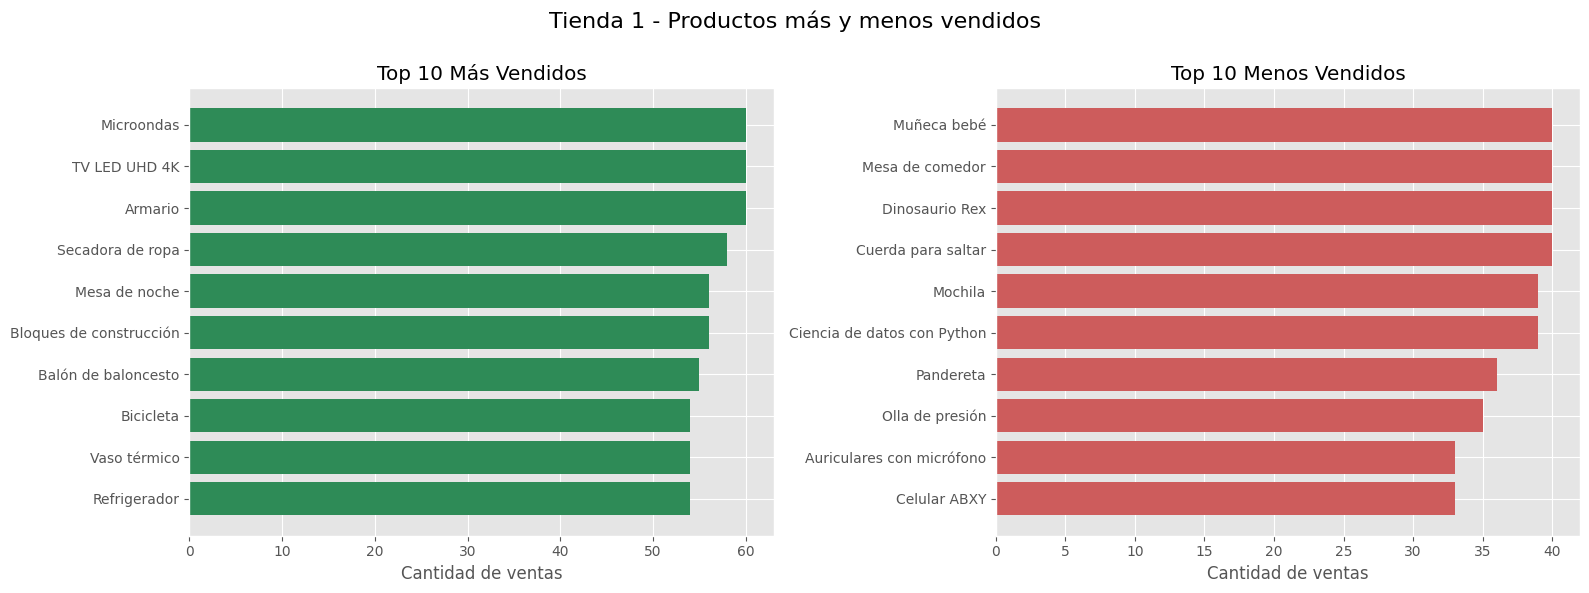

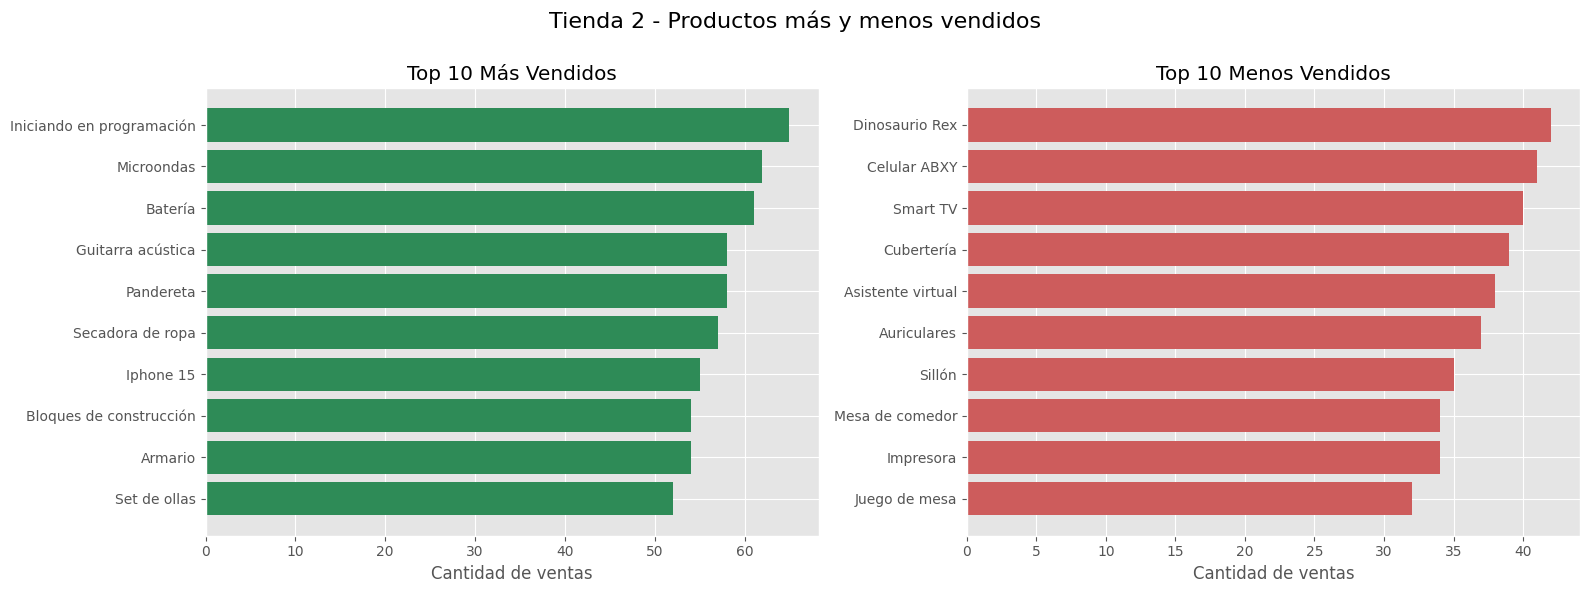

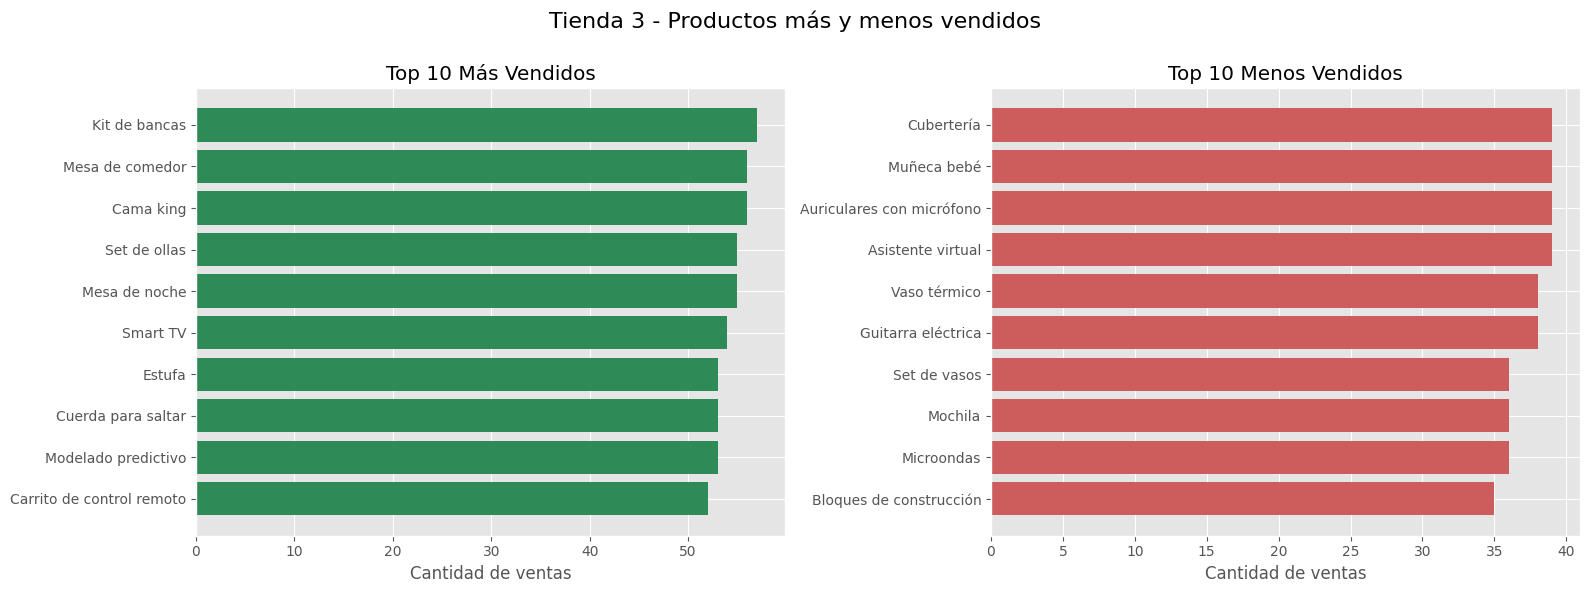

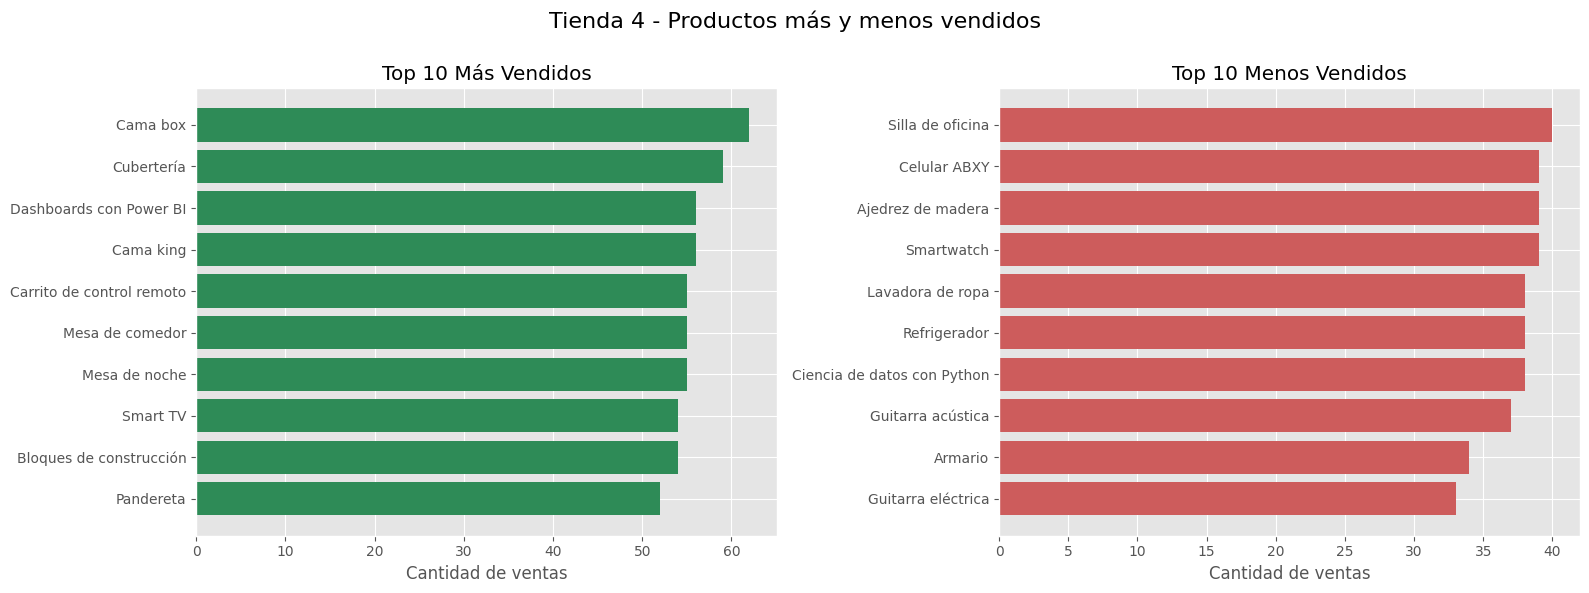

In [119]:
 # URLs de los datos
urls = {
    "Tienda 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "Tienda 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "Tienda 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "Tienda 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}
# Estilo del gráfico
plt.style.use("ggplot")

# Para poder procesar cada tienda
for nombre, url in urls.items():
    df = pd.read_csv(url)

    # Contar ventas por cada producto
    conteo_productos = df['Producto'].value_counts()

    # Top y bottom 10
    top_10 = conteo_productos.head(10)
    bottom_10 = conteo_productos.tail(10)

    # Crear gráficos
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'{nombre} - Productos más y menos vendidos', fontsize=16)

    # Más vendidos
    axes[0].barh(top_10.index[::-1], top_10.values[::-1], color='seagreen')
    axes[0].set_title('Top 10 Más Vendidos')
    axes[0].set_xlabel('Cantidad de ventas')

    # Menos vendidos
    axes[1].barh(bottom_10.index[::-1], bottom_10.values[::-1], color='indianred')
    axes[1].set_title('Top 10 Menos Vendidos')
    axes[1].set_xlabel('Cantidad de ventas')

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

# 5. Envío promedio por tienda

In [135]:
import pandas as pd

# Cargar los datos
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Calcular el promedio del costo de envío por tienda
envio_prom_t1 = tienda1["Costo de envío"].mean()
envio_prom_t2 = tienda2["Costo de envío"].mean()
envio_prom_t3 = tienda3["Costo de envío"].mean()
envio_prom_t4 = tienda4["Costo de envío"].mean()

# Imprimir los resultados
print("Costo de envío promedio por tienda:")
print(f"Tienda 1: ${envio_prom_t1:,.0f}".replace(",", "."))
print(f"Tienda 2: ${envio_prom_t2:,.0f}".replace(",", "."))
print(f"Tienda 3: ${envio_prom_t3:,.0f}".replace(",", "."))
print(f"Tienda 4: ${envio_prom_t4:,.0f}".replace(",", "."))


Costo de envío promedio por tienda:
Tienda 1: $26.019
Tienda 2: $25.216
Tienda 3: $24.806
Tienda 4: $23.459


- Esto podría significar que Tienda 1 tiene mayores gastos logísticos, rutas más costosas o una política de envío menos competitiva.
- Por otro lado, la Tienda 4 podría estar optimizando su logística, tener acuerdos con transportistas más económicos, o usar costos de envío como estrategia para atraer más clientes.

GRAFICOS

<ipython-input-138-930a261b4476>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(costos_envio.keys()), y=list(costos_envio.values()), palette="Blues_d")


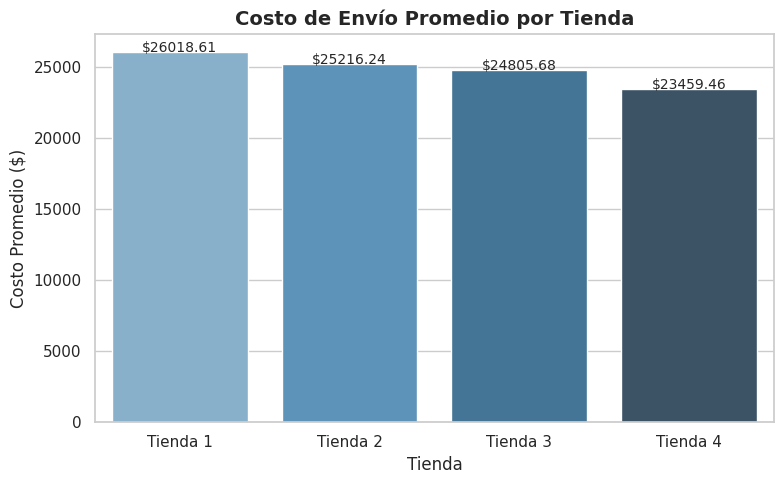

<ipython-input-138-930a261b4476>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(producto_mas_vendido.keys()), y=list(producto_ventas.values()), palette="Greens_d")


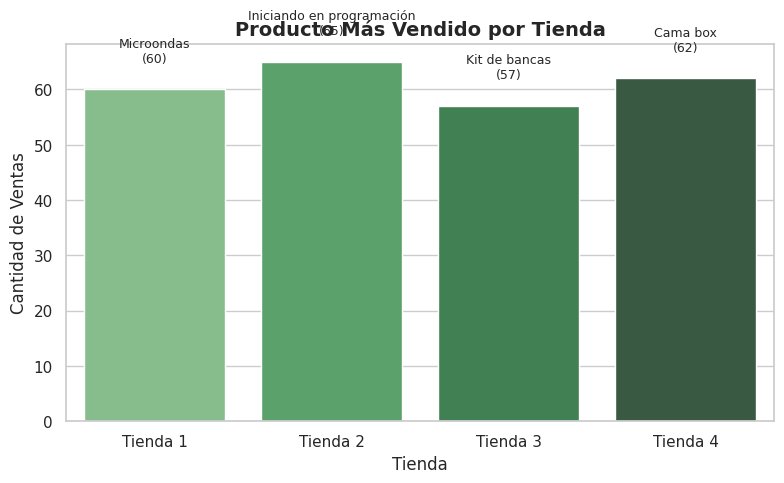

<ipython-input-138-930a261b4476>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(calificaciones.keys()), y=list(calificaciones.values()), palette="Oranges_d")


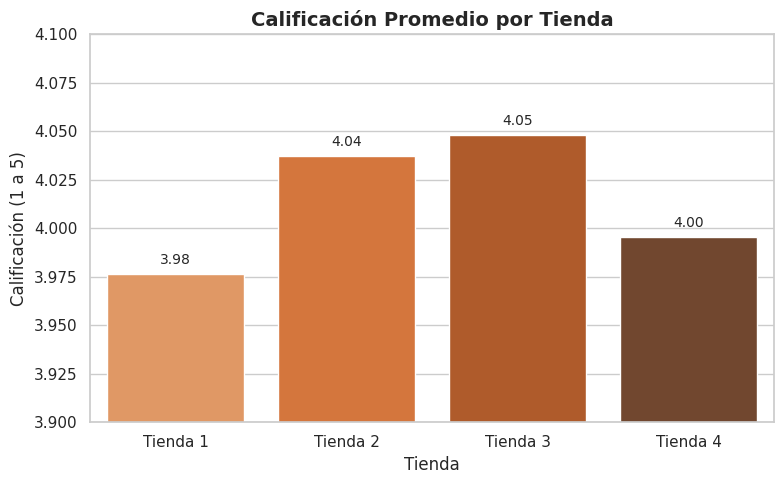

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Activar estilo de seaborn
sns.set(style="whitegrid", palette="pastel")

# Cargar los datos
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Costo de envío promedio
costos_envio = {
    "Tienda 1": tienda1["Costo de envío"].mean(),
    "Tienda 2": tienda2["Costo de envío"].mean(),
    "Tienda 3": tienda3["Costo de envío"].mean(),
    "Tienda 4": tienda4["Costo de envío"].mean()
}

# Producto más vendido por tienda
producto_mas_vendido = {
    "Tienda 1": tienda1["Producto"].value_counts().idxmax(),
    "Tienda 2": tienda2["Producto"].value_counts().idxmax(),
    "Tienda 3": tienda3["Producto"].value_counts().idxmax(),
    "Tienda 4": tienda4["Producto"].value_counts().idxmax()
}

producto_ventas = {
    "Tienda 1": tienda1["Producto"].value_counts().max(),
    "Tienda 2": tienda2["Producto"].value_counts().max(),
    "Tienda 3": tienda3["Producto"].value_counts().max(),
    "Tienda 4": tienda4["Producto"].value_counts().max()
}

# Calificaciones promedio por tienda
calificaciones = {
    "Tienda 1": tienda1["Calificación"].mean(),
    "Tienda 2": tienda2["Calificación"].mean(),
    "Tienda 3": tienda3["Calificación"].mean(),
    "Tienda 4": tienda4["Calificación"].mean()
}

# Gráfico 1: Costo de envío promedio
plt.figure(figsize=(8, 5))
sns.barplot(x=list(costos_envio.keys()), y=list(costos_envio.values()), palette="Blues_d")
plt.title("Costo de Envío Promedio por Tienda", fontsize=14, weight='bold')
plt.ylabel("Costo Promedio ($)")
plt.xlabel("Tienda")
for i, valor in enumerate(costos_envio.values()):
    plt.text(i, valor + 0.1, f"${valor:.2f}", ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# Gráfico 2: Producto más vendido por tienda
plt.figure(figsize=(8, 5))
sns.barplot(x=list(producto_mas_vendido.keys()), y=list(producto_ventas.values()), palette="Greens_d")
plt.title("Producto Más Vendido por Tienda", fontsize=14, weight='bold')
plt.ylabel("Cantidad de Ventas")
plt.xlabel("Tienda")
for i, valor in enumerate(producto_ventas.values()):
    producto = list(producto_mas_vendido.values())[i]
    plt.text(i, valor + 5, f"{producto}\n({valor})", ha='center', fontsize=9)
plt.tight_layout()
plt.show()

# Gráfico 3: Calificación promedio
plt.figure(figsize=(8, 5))
sns.barplot(x=list(calificaciones.keys()), y=list(calificaciones.values()), palette="Oranges_d")
plt.title("Calificación Promedio por Tienda", fontsize=14, weight='bold')
plt.ylabel("Calificación (1 a 5)")
plt.xlabel("Tienda")
plt.ylim(3.9, 4.1)
for i, valor in enumerate(calificaciones.values()):
    plt.text(i, valor + 0.005, f"{valor:.2f}", ha='center', fontsize=10)
plt.tight_layout()
plt.show()